In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
dados1 = pd.read_csv('Data/data_cancer_2005_2019.csv', sep = ',', encoding = 'utf-8', low_memory = False)

In [27]:
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957959 entries, 0 to 957958
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         957959 non-null  int64  
 1   codigo_paciente    957959 non-null  int64  
 2   local_atendimento  957959 non-null  object 
 3   sexo               957959 non-null  object 
 4   idade              906892 non-null  float64
 5   cor                957959 non-null  object 
 6   nacionalidade      570600 non-null  object 
 7   estado_nascimento  572603 non-null  object 
 8   estado             957923 non-null  object 
 9   data               957958 non-null  object 
 10  data_obito         328005 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 80.4+ MB


In [28]:
dados1.head()

,Unnamed: 0,codigo_paciente,local_atendimento,sexo,idade,cor,nacionalidade,estado_nascimento,estado,data,data_obito
0,0,672054,RCBP CAMPINAS-UNICAMP,MASCULINO,30.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,07/10/2005,07/10/2005
1,1,673745,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,21/10/2005,21/10/2005
2,2,676350,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,06/11/2005,06/11/2005
3,3,679877,RCBP CAMPINAS-UNICAMP,FEMININO,57.0,PARDA,BRASIL,ALAGOAS,SÃO PAULO,15/05/2005,15/05/2005
4,4,676553,RCBP CAMPINAS-UNICAMP,MASCULINO,52.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,24/02/2005,24/02/2005


In [4]:
dados1.columns

Index(['Unnamed: 0', 'codigo_paciente', 'local_atendimento', 'sexo', 'idade',
       'cor', 'nacionalidade', 'estado_nascimento', 'estado', 'data',
       'data_obito'],
      dtype='object')

In [29]:
dados2 = dados1[[
    'codigo_paciente', 'local_atendimento', 'sexo', 'idade',
    'cor', 'nacionalidade', 'estado_nascimento', 'estado', 'data',
    'data_obito'
]]

In [17]:
dados2.head()

,codigo_paciente,local_atendimento,sexo,idade,cor,nacionalidade,estado_nascimento,estado,data,data_obito
0,672054,RCBP CAMPINAS-UNICAMP,MASCULINO,30.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,07/10/2005,07/10/2005
1,673745,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,21/10/2005,21/10/2005
2,676350,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,06/11/2005,06/11/2005
3,679877,RCBP CAMPINAS-UNICAMP,FEMININO,57.0,PARDA,BRASIL,ALAGOAS,SÃO PAULO,15/05/2005,15/05/2005
4,676553,RCBP CAMPINAS-UNICAMP,MASCULINO,52.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,24/02/2005,24/02/2005


In [31]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957959 entries, 0 to 957958
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   codigo_paciente    957959 non-null  int64  
 1   local_atendimento  957959 non-null  object 
 2   sexo               957959 non-null  object 
 3   idade              906892 non-null  float64
 4   cor                957959 non-null  object 
 5   nacionalidade      570600 non-null  object 
 6   estado_nascimento  572603 non-null  object 
 7   estado             957923 non-null  object 
 8   data               957958 non-null  object 
 9   data_obito         328005 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 73.1+ MB


In [13]:
dados2.sexo.unique()

array(['MASCULINO', 'FEMININO', 'IGNORADO'], dtype=object)

In [15]:
dados2.isnull().sum()

codigo_paciente           0
local_atendimento         0
sexo                      0
idade                 51067
cor                       0
nacionalidade        387359
estado_nascimento    385356
estado                   36
data                      1
data_obito           629954
dtype: int64

In [43]:
dados2['sexo'].value_counts()

FEMININO     527913
MASCULINO    429937
IGNORADO        109
Name: sexo, dtype: int64

In [54]:
sexos = dados2[dados2['sexo'] == 'IGNORADO'].index
sexos

Int64Index([327812, 327930, 328163, 359642, 359734, 359770, 359782, 359787,
            360186, 360641,
            ...
            926012, 926045, 926053, 926091, 926156, 926532, 926808, 941094,
            943153, 951730],
           dtype='int64', length=109)

In [55]:
sexos_masc_fem = dados2.drop(sexos)

<AxesSubplot:xlabel='sexo', ylabel='Count'>

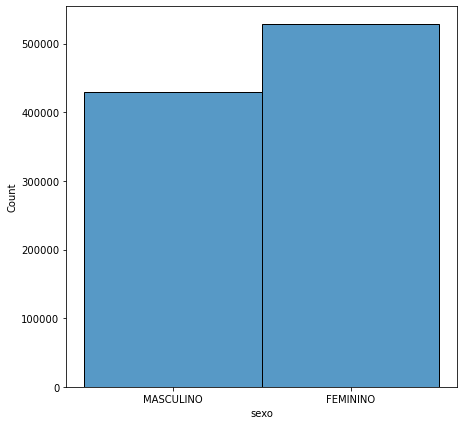

In [71]:
plt.figure(figsize=(7,7))
sns.histplot(data=sexos_masc_fem, x='sexo', palette=['r','b'])